In [1]:
import glob
import skimage.io as io
import numpy as np
#import commonfunctions as cf
from skimage.feature import hog
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn import metrics
import pickle
import cv2
import random
import os

/home/mohamed/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
'''
        DO NOT RUN AGAIN
'''

male_path='/dataset/Male/Male'
female_path='/dataset/Female/Female'
#print(os.listdir(os.getcwd()+male_path))
male_path=os.getcwd()+male_path
female_path=os.getcwd()+female_path

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
male_data=np.array(load_images_from_folder(male_path))

female_data=np.array( load_images_from_folder(female_path) )

In [ ]:
#save male_data as numpy array

'''
        DO NOT RUN AGAIN
'''
np.save('male_data.npy',male_data)
np.save('female_data.npy',female_data)

In [ ]:
male_data=np.load('male_data.npy',allow_pickle=True)
female_data=np.load('female_data.npy',allow_pickle=True)

In [ ]:
print(female_data.shape)

(133,)


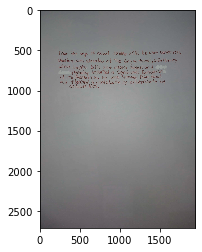

In [ ]:
plt.imshow(female_data[0])

In [ ]:
print (male_data.shape)

(125,)


In [ ]:
## loop over male data  
for i,image in enumerate(male_data):
    male_data[i]=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)



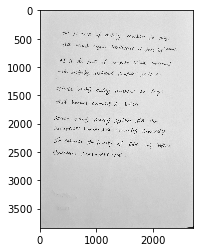

In [ ]:
plt.imshow(male_data[99],cmap='gray')

In [ ]:
## loop over male data  
for i,image in enumerate(female_data):
    female_data[i]=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


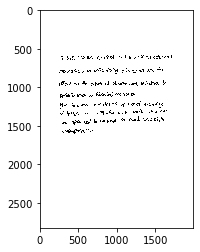

In [ ]:

for i in range(0,100):
    image=female_data[i]
    image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    image = cv2.medianBlur(image, 5)
    image = cv2.medianBlur(image, 5)
    image = cv2.erode(image, None, iterations = 1)
    plt.imshow(image,cmap='gray')
    cv2.imwrite(f'lol{i}.png',image)




In [ ]:
print("jas")